## Predicting heart disease using machine learning
1. Problem defination
2. data
3. evaluation (when can we say the project is successfull)
4. Features
5. modelling
6. experimentation
## 1) Problem defination
Given clinical data can we predict whether the patient has heart disease
## 2) Data
Import the data from appropriate resources. We have loaded the dataset from https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci
## 3) Evaluation 
It is important to think what are we looking for in the result. What performace will ensure the model is built efficiently. If we reach 95% accuracy at predicting whether the person has heart disease or not we can say that we have successfully built the model and the model is ready for deployment.
## 4) Features
This is where you get information about the data from the subject matter expert.

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import sklearn
sklearn.__version__ # will print out the version number
# Available in Scikit-Learn version 1.2+


'1.6.1'

In [2]:
## Preparing the tools
# we are going to use matplotlib numpy pandas scikitlearn
## Import all the tools we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline 

#models from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evalautions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Data 

In [3]:
#load the dataset
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis

## The goal of this section is to find more about the data and become a subject matter expert
1. What question are you trying to solve
2. What kind of data we have and how do we treat different types of data
3. What is the missing value of the data and how do we deal with it
4. Where are the outliers and why should you care about them
5. How can you add, remove or change features to get more of the data


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df["target"].value_counts().plot(kind="bar", color=['salmon', 'lightblue']);

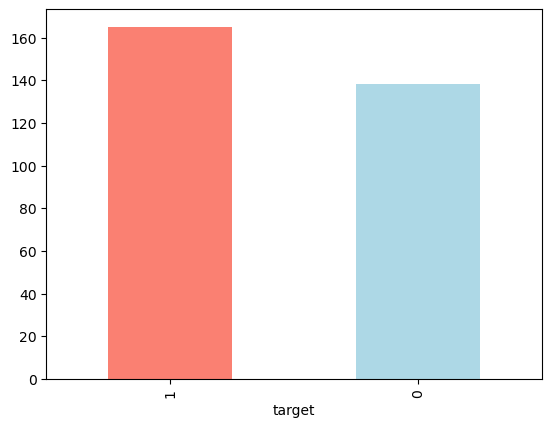

In [8]:
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#find out if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [12]:
df.sex.value_counts()
#0 is for females and 1 is for male

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
# if there is a female there are 75% chances of getting a heart disease 
# we have to beat this odd 

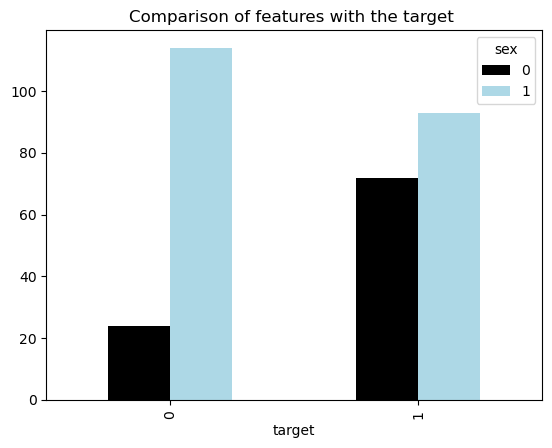

In [15]:
#create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["black", "lightblue"]);
plt.title("Comparison of features with the target ")
plt.show()

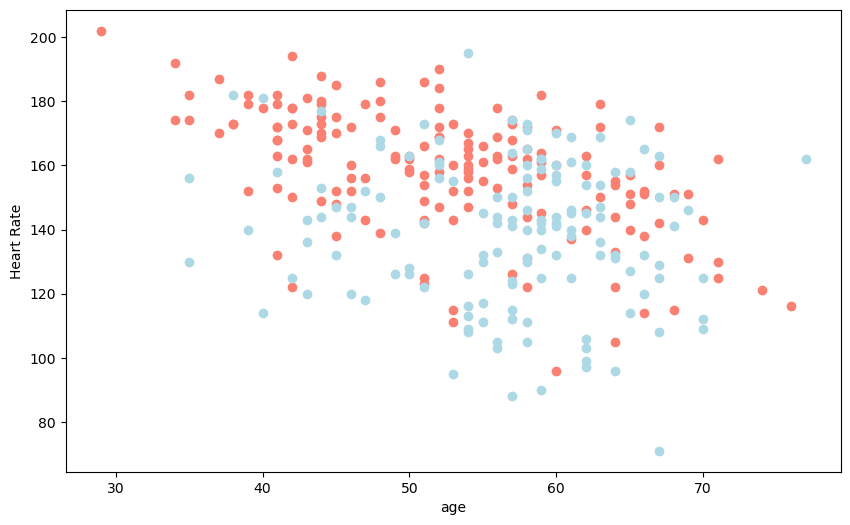

In [16]:
#now we will see how to do scatter plot
#setting up the figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.xlabel("age")
plt.ylabel("Heart Rate")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.show()

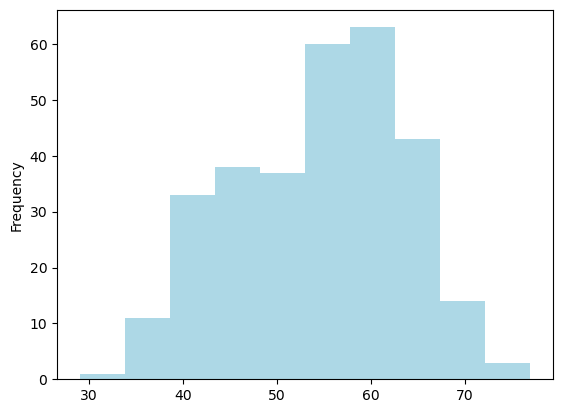

In [17]:
#check the distribution of age column with a histogram
df.age.plot.hist(color="lightblue");
plt.show()

In [18]:
# now we will see how chest pain is related to target variable
'''cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern'''

'cp - chest pain type\n    * 0: Typical angina: chest pain related decrease blood supply to the heart\n    * 1: Atypical angina: chest pain not related to heart\n    * 2: Non-anginal pain: typically esophageal spasms (non heart related)\n    * 3: Asymptomatic: chest pain not showing signs of disease\n4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern'

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


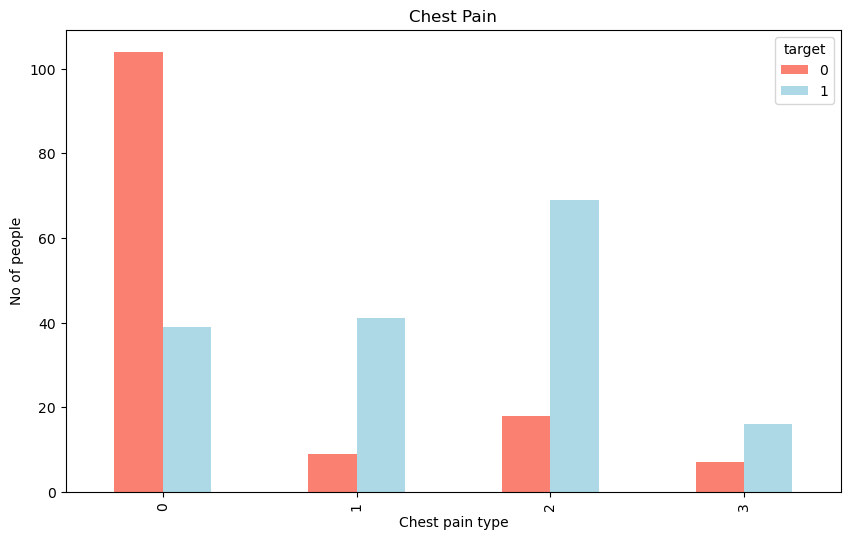

In [20]:
#making it more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6),color=["salmon", "lightblue"]);
plt.xlabel("Chest pain type")
plt.ylabel("No of people")
plt.title("Chest Pain")
plt.show()

In [21]:
# how are the independent variables are related to the taarget variable or each other 
corr_matrix=df.corr()

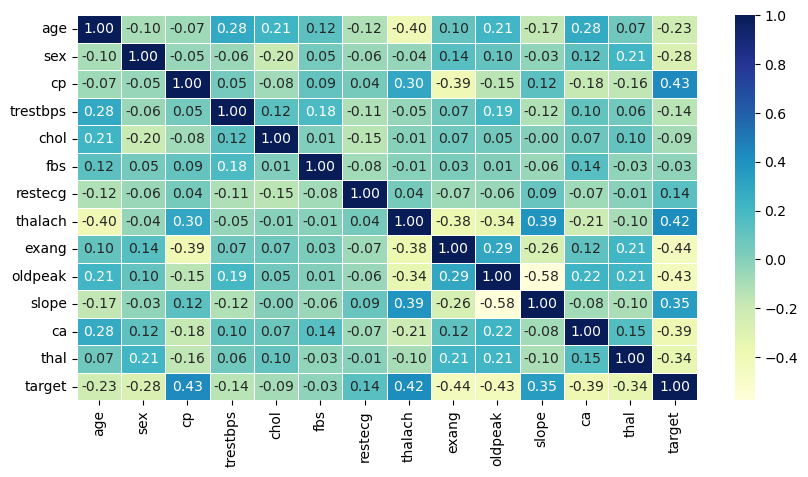

In [22]:
## now we will plot it for better visualization
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

## Modelling

In [23]:
#split the data into X and Y 
X=df.drop("target",axis=1)
Y=df["target"]

In [24]:
#generate random numbers
np.random.seed(42)
#we will split the data into training and test data 
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# now that we have split the data into test and train we will now find the right model that best predicts the right value
we are going to try 3 machine learning models 
1) logistic regression
2) k-nearest neighbours
3) Random forest

In [27]:
#put models in a dictionary
models={"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Random Forest":RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    fits and evaluate given machine learning model
    models: A dictionary of different machine learning models
    X_train: Training examples of the features on which the data is trained
    y_train: target variable for the training samples
    y_test: target variables for the output sample
    '''
    #set random seeds to make results reproducable
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores={}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores
        

In [32]:
model_scores=fit_and_score(models=models,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\Gaurav\heart_disease_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

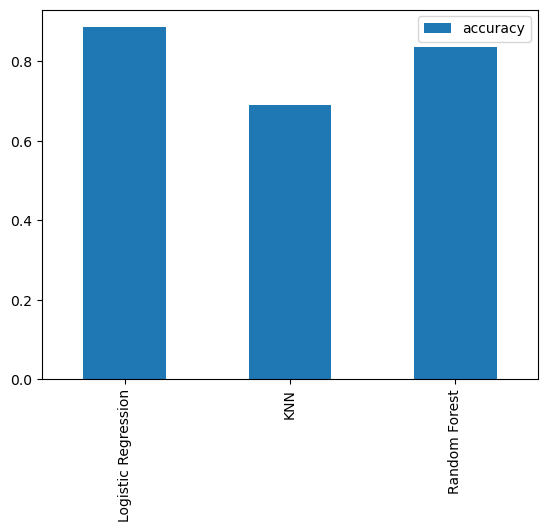

In [42]:
# now we will compare the results obtained in the above
plot_score=pd.DataFrame(model_scores, index=["accuracy"])
plot_score.T.plot.bar();
plt.show()

Hyperparamter tuning
feature importance 
confusion matrix
cross validation 
precision
recall 
f1 score 
classification report 
roc curve 
area under the curve
